In [40]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt

In [41]:
filePath = './DATASET/TSLA_03_15.csv'
intputFeatureList = ['open', 'high', 'low', 'close', 'volume',\
                      'V1', 'V2', 'V3']
(prevMin, predMin) = (60, 10)

In [42]:
df = pd.read_csv(filePath)
print(df.columns)

Index(['symbol', 'unix', 't', 'o', 'h', 'l', 'c', 'v', 'vw', 'V1', 'V2', 'V3'], dtype='object')


In [43]:
# Decrease the number of index into half
df = df.loc[int(len(df) / 2):len(df) - 1]
df = df.reset_index()
df['index'] = df['index'] - df['index'][0]
df

,index,symbol,unix,t,o,h,l,c,v,vw,V1,V2,V3
0,0,TSLA,1.661770e+12,8/29/2022 6:46,281.78,281.78,281.78,281.78,767,281.7424,0.00,0.00,-92935.9
1,1,TSLA,1.661770e+12,8/29/2022 6:47,281.65,281.65,281.51,281.51,1240,281.5967,0.14,-0.14,-93098.6
2,2,TSLA,1.661770e+12,8/29/2022 6:48,281.53,281.53,281.53,281.53,430,281.5638,0.00,0.00,-96630.8
3,3,TSLA,1.661770e+12,8/29/2022 6:49,281.52,281.60,281.52,281.60,944,281.5591,0.08,0.08,-97938.7
4,4,TSLA,1.661770e+12,8/29/2022 6:50,281.65,281.70,281.65,281.70,537,281.6778,0.05,0.05,-100390.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123789,123789,TSLA,1.678840e+12,3/14/2023 19:55,184.09,184.10,184.08,184.10,6340,184.0913,0.02,0.01,-132748.1
123790,123790,TSLA,1.678840e+12,3/14/2023 19:56,184.13,184.18,184.10,184.14,8697,184.1497,0.08,0.01,-137864.1
123791,123791,TSLA,1.678840e+12,3/14/2023 19:57,184.12,184.12,184.05,184.12,9337,184.0960,0.07,0.00,-149057.6
123792,123792,TSLA,1.678840e+12,3/14/2023 19:58,184.09,184.16,184.09,184.16,7253,184.1108,0.07,0.07,-151992.1


In [44]:
# Rename the columns into sample format
df = df.rename(columns={'t': 'time stamp', 'o': 'open', 'h': 'high', \
                        'l': 'low', 'c': 'close', 'v': 'volume'})
df.columns

Index(['index', 'symbol', 'unix', 'time stamp', 'open', 'high', 'low', 'close',
       'volume', 'vw', 'V1', 'V2', 'V3'],
      dtype='object')

In [45]:
# Get the desired columns in the dataframe
df = df[['time stamp', 'open', 'high', 'low', 'close', 'volume', 'V1', 'V2', 'V3']]
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', \
                                           'close']].round(decimals=4)
df['time stamp'] = pd.to_datetime(df['time stamp'])
df.head(10)

,time stamp,open,high,low,close,volume,V1,V2,V3
0,2022-08-29 06:46:00,281.78,281.78,281.78,281.78,767,0.00,0.00,-92935.9
1,2022-08-29 06:47:00,281.65,281.65,281.51,281.51,1240,0.14,-0.14,-93098.6
2,2022-08-29 06:48:00,281.53,281.53,281.53,281.53,430,0.00,0.00,-96630.8
3,2022-08-29 06:49:00,281.52,281.60,281.52,281.60,944,0.08,0.08,-97938.7
4,2022-08-29 06:50:00,281.65,281.70,281.65,281.70,537,0.05,0.05,-100390.2
5,2022-08-29 06:52:00,281.74,281.82,281.74,281.80,2004,0.08,0.06,-95989.5
6,2022-08-29 06:53:00,281.81,281.81,281.22,281.22,8834,0.59,-0.59,-82116.7
7,2022-08-29 06:54:00,281.31,281.49,281.25,281.49,3799,0.24,0.18,-84740.9
8,2022-08-29 06:55:00,281.41,281.41,281.02,281.02,4327,0.39,-0.39,-86097.5
9,2022-08-29 06:56:00,281.05,281.05,280.81,281.00,4816,0.24,-0.05,-92206.1


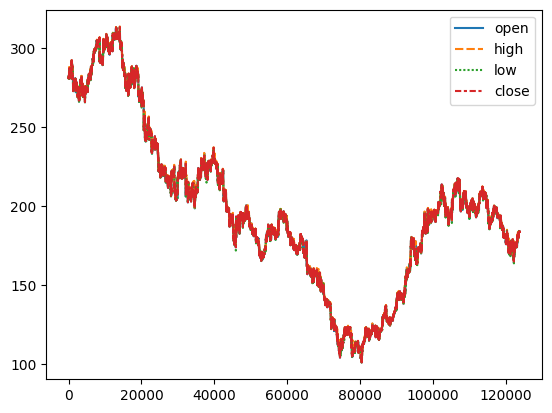

In [46]:
# Display the stock of open, high, low, close
sb.lineplot(data = df[['open', 'high', 'low', 'close']])
plt.show()

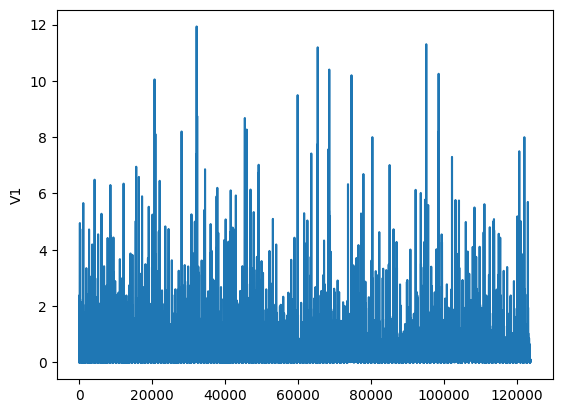

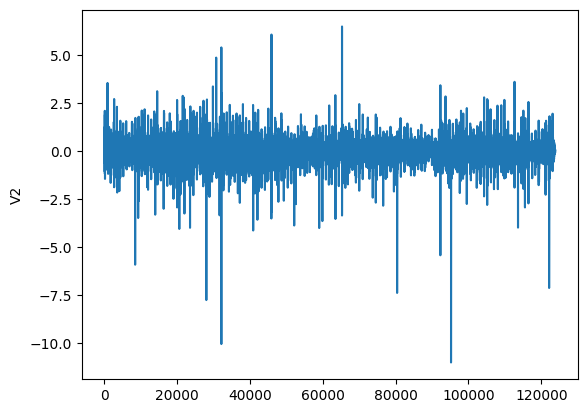

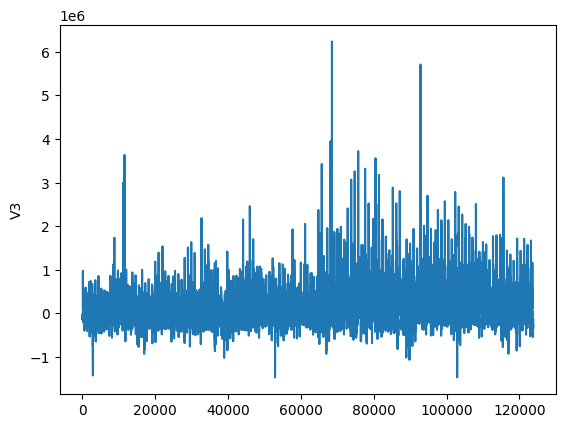

In [47]:
# Display the additional Parameters
plt.figure()
sb.lineplot(data = df['V1'])
plt.figure()
sb.lineplot(data = df['V2'])
plt.figure()
sb.lineplot(data = df['V3'])
plt.show()

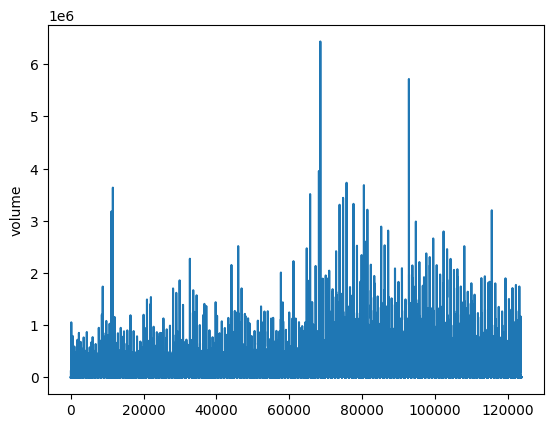

In [48]:
# Display the stock of volume
sb.lineplot(data = df['volume'])
plt.show()

In [49]:
# Split the dataframe into training and test dataset
df_train = df[0:int(len(df) * 0.6)]
df_val = df[int(len(df) * 0.6):int(len(df) * 0.8)]
df_test = df[int(len(df) * 0.8):-1]
print(len(df_train), len(df_val), len(df_test))

74276 24759 24758


In [50]:
# Print the tail of training, validation and test datasets
print(df_train.tail())
print(df_val.tail())
print(df_test.tail())

               time stamp      open   high     low   close  volume    V1  \
74271 2022-12-27 17:04:00  107.4000  107.4  107.25  107.27   58510  0.15   
74272 2022-12-27 17:05:00  107.2700  107.3  107.12  107.16   71213  0.18   
74273 2022-12-27 17:06:00  107.1596  107.4  107.14  107.40  104123  0.26   
74274 2022-12-27 17:07:00  107.4100  107.5  107.36  107.50   49731  0.14   
74275 2022-12-27 17:08:00  107.5000  109.1  107.37  107.38   32299  1.73   

           V2        V3  
74271 -0.1300   54984.1  
74272 -0.1100   67753.4  
74273  0.2404  100420.7  
74274  0.0900   45914.7  
74275 -0.1200   28865.2  
               time stamp    open    high     low   close  volume    V1    V2  \
99030 2023-02-03 17:08:00  190.07  190.07  190.05  190.05    1398  0.02 -0.02   
99031 2023-02-03 17:09:00  190.09  190.09  190.05  190.05    4201  0.04 -0.04   
99032 2023-02-03 17:10:00  190.07  190.07  190.04  190.05    6445  0.03 -0.02   
99033 2023-02-03 17:11:00  190.04  190.07  190.04  190.07    40

In [51]:
# Normalize the dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training = scaler.fit_transform(df_train[intputFeatureList])
validation = scaler.transform(df_val[intputFeatureList])
test = scaler.transform(df_test[intputFeatureList])

In [52]:
print(training.shape, validation.shape, test.shape)

(74276, 8) (24759, 8) (24758, 8)


In [53]:
"""Define the function to create 
the input and output dataset for the training, validation and test"""
def create_dataset(transformed, df, prevMin, predMin):
    Xs, ys = [], []
    for i in range(len(transformed) - prevMin - predMin):
        vx = []
        for j in range(prevMin):
            vx.append(transformed[i + j])
        vy = []
        for j in range(predMin):
            vy.append(df['close'].iloc[i + j + prevMin])
        vx = np.array(vx)
        vy = np.array(vy)
        vx = vx.reshape(-1, 1)
        Xs.append(vx)
        ys.append(vy)
    return np.array(Xs), np.array(ys)

In [54]:
# Create the input and output of the models; prevMin=60m, predMin=10m
train_X, train_y = create_dataset(training, df_train, prevMin, predMin)
val_X, val_y = create_dataset(validation, df_val, prevMin, predMin)
test_X, test_y = create_dataset(test, df_test, prevMin, predMin)

In [55]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(74206, 480, 1) (74206, 10)
(24689, 480, 1) (24689, 10)
(24688, 480, 1) (24688, 10)


<AxesSubplot:>

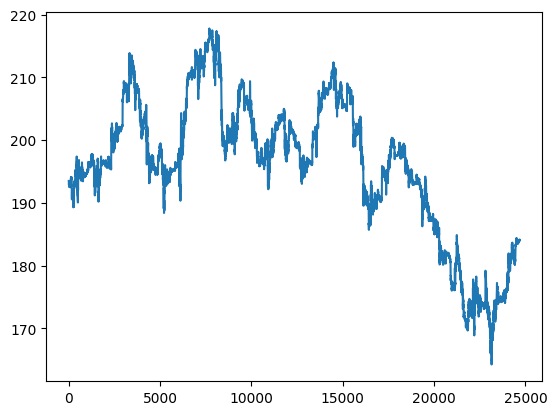

In [56]:
sb.lineplot(test_y[:, 0])

In [57]:
df_new = df.loc[int(len(df) / 2):len(df) - 1]
df_new = df_new.reset_index()
df_new['index'] = df_new['index'] - df_new['index'][0]
df_new

,index,time stamp,open,high,low,close,volume,V1,V2,V3
0,0,2022-12-07 11:34:00,172.9400,173.1300,172.8100,172.9800,163785,0.3200,0.0400,8754.0
1,1,2022-12-07 11:35:00,172.9750,173.3000,172.8700,173.2000,158087,0.4300,0.2250,17719.7
2,2,2022-12-07 11:36:00,173.2022,173.5831,173.2022,173.4900,214644,0.3809,0.2878,86032.8
3,3,2022-12-07 11:37:00,173.4700,173.4899,173.3600,173.3875,122925,0.1299,-0.0825,-539.1
4,4,2022-12-07 11:38:00,173.3700,173.5000,173.2100,173.2980,159697,0.2900,-0.0720,45573.1
...,...,...,...,...,...,...,...,...,...,...
61892,61892,2023-03-14 19:55:00,184.0900,184.1000,184.0800,184.1000,6340,0.0200,0.0100,-132748.1
61893,61893,2023-03-14 19:56:00,184.1300,184.1800,184.1000,184.1400,8697,0.0800,0.0100,-137864.1
61894,61894,2023-03-14 19:57:00,184.1200,184.1200,184.0500,184.1200,9337,0.0700,0.0000,-149057.6
61895,61895,2023-03-14 19:58:00,184.0900,184.1600,184.0900,184.1600,7253,0.0700,0.0700,-151992.1
